In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

langs = ['Afrikaans',
 'Akkadian',
 'Akuntsu',
 'Albanian',
 'Ancient Greek',
 'Apurina',
 'Arabic',
 'Armenian',
 'Assyrian',
 'Bambara',
 'Basque',
 'Belarusian',
 'Bhojpuri',
 'Breton',
 'Bulgarian',
 'Buryat',
 'Cantonese',
 'Catalan',
 'Chinese',
 'Chukchi',
 'Classical Chinese',
 'Croatian',
 'Czech',
 'Danish',
 'Dutch',
 'English',
 'Erzya',
 'Estonian',
 'Faroese',
 'Finnish',
 'French',
 'Galician',
 'German',
 'Gothic',
 'Greek',
 'Guajajara',
 'Hebrew',
 'Hindi',
 'Hungarian',
 'Icelandic',
 'Indonesian',
 'Irish',
 'Italian',
 'Japanese',
 'Kaapor',
 'Kangri',
 'Karelian',
 'Kazakh',
 'Khunsari',
 'Kiche',
 'Komi Permyak',
 'Komi Zyrian',
 'Korean',
 'Kurmanji',
 'Latin',
 'Latvian',
 'Lithuanian',
 'Livvi',
 'Low Saxon',
 'Makurap',
 'Maltese',
 'Manx',
 'Marathi',
 'Mbya Guarani',
 'Moksha',
 'Munduruku',
 'Naija',
 'Nayini',
 'North Sami',
 'Norwegian',
 'Old Church Slavonic',
 'Old East Slavic',
 'Old French',
 'Old Turkish',
 'Persian',
 'Polish',
 'Portuguese',
 'Romanian',
 'Russian',
 'Sanskrit',
 'Scottish Gaelic',
 'Serbian',
 'Skolt Sami',
 'Slovak',
 'Slovenian',
 'South Levantine Arabic',
 'Spanish',
 'Swedish',
 'Swiss German',
 'Tagalog',
 'Tamil',
 'Telugu',
 'Thai',
 'Tupinamba',
 'Turkish',
 'Ukrainian',
 'Upper Sorbian',
 'Urdu',
 'Uyghur',
 'Vietnamese',
 'Warlpiri',
 'Welsh',
 'Western Armenian',
 'Wolof',
 'Yoruba']

lang_list = [l.upper().replace(" ", "_") for l in langs]

len(langs)

105

In [2]:
import os

os.getcwd()

'/Volumes/Projects/xling-benchmarks'

In [11]:
f1 = open("research/asjp/lists.txt", encoding="ISO-8859-1")
f2 = open("research/udpos/asjp-lists.txt", "w", encoding="ISO-8859-1")

lang_map = {
    "GREEK_ANCIENT": "ANCIENT_GREEK",
    "STANDARD_ARABIC": "ARABIC",
    "ASSYRIAN_NEO_ARAMAIC": "ASSYRIAN",
    "MANDARIN": "CHINESE",
    "OLD_CHINESE": "CLASSICAL_CHINESE",
    "STANDARD_GERMAN": "GERMAN",
    "URUBU_KAAPOR": "KAAPOR",
    "NORTHERN_LOW_SAXON": "LOW_SAXON",
    "NORWEGIAN_BOKMAAL": "NORWEGIAN",
    "OLD_TURKIC": "OLD_TURKISH",
    "SERBOCROATIAN": "SERBIAN",
    "GAELIC_SCOTTISH": "SCOTTISH_GAELIC",
    "SKOLT_SAAMI": "SKOLT_SAMI",
    "KURDISH_KURMANJI": "KURMANJI",
    "MBYA_GUARANI": "MBYA"
}

lang_list_found = []

next(f1)
f2.write("     2    28  0     1    92    72                       \n")

content = False
include = False
for line in f1:
    if not content:
        f2.write(line)
        if line == "                                 \n":
            content = True
        continue

    if "{" in line and line.endswith("}\n"):
        lang_id = line.split("{")[0]
        if lang_map.get(lang_id, lang_id) in lang_list:
            include = True
            lang_list_found.append(lang_id)
            f2.write(f"{lang_id}\n")
        else:
            include = False
        continue
    
    if include:
        f2.write(line)
f2.write("     \n")

set(lang_list) - set(lang_list_found), len(lang_list), len(lang_list_found)

({'ANCIENT_GREEK',
  'ARABIC',
  'ASSYRIAN',
  'BURYAT',
  'CHINESE',
  'CHUKCHI',
  'CLASSICAL_CHINESE',
  'GERMAN',
  'KAAPOR',
  'KANGRI',
  'KHUNSARI',
  'KURMANJI',
  'LIVVI',
  'LOW_SAXON',
  'MBYA_GUARANI',
  'NAIJA',
  'NORTH_SAMI',
  'NORWEGIAN',
  'OLD_EAST_SLAVIC',
  'OLD_FRENCH',
  'OLD_TURKISH',
  'SCOTTISH_GAELIC',
  'SERBIAN',
  'SKOLT_SAMI',
  'SOUTH_LEVANTINE_ARABIC',
  'SWISS_GERMAN'},
 105,
 93)

In [12]:
!./research/asjp/asjp62 < research/udpos/asjp-lists.txt > research/udpos/asjp-ldnd.txt

In [13]:

with open("research/udpos/asjp-ldnd.txt") as f:
    next(f); next(f); next(f)
    n = len(next(f).strip().split()) - 1

    ldnd_langs = []
    table = np.zeros((n, n))
    next(f)

    for i, line in enumerate(f):
        if not line.strip():
            break
        lang, *scores = line.strip().split()
        scores = [float(s) for s in scores]
        table[i, :len(scores)] = scores
        table[:len(scores), i] = scores
        ldnd_langs.append(lang)

assert n == len(ldnd_langs)
table

array([[  0.  ,  52.34,  83.12, ...,  97.46, 102.69,  96.91],
       [ 52.34,   0.  ,  89.45, ..., 100.76, 103.84,  99.8 ],
       [ 83.12,  89.45,   0.  , ..., 103.05, 102.9 , 105.62],
       ...,
       [ 97.46, 100.76, 103.05, ...,   0.  ,  54.57,  48.21],
       [102.69, 103.84, 102.9 , ...,  54.57,   0.  ,  53.99],
       [ 96.91,  99.8 , 105.62, ...,  48.21,  53.99,   0.  ]])

In [38]:
pretty_ldnd_names = [langs[lang_list.index(lang_map.get(l, l))] for l in ldnd_langs]

df = pd.DataFrame(table, index=pretty_ldnd_names, columns=pretty_ldnd_names)
df = df.mask(df.apply(lambda x: x.name == x.index))

df.to_csv("research/udpos/ldnd.csv")
df

,Akkadian,Assyrian,Hebrew,Maltese,Arabic,Bambara,Yoruba,Wolof,Basque,Albanian,...,Vietnamese,Tagalog,Indonesian,Warlpiri,Kiche,Apurina,Munduruku,Guajajara,Tupinamba,Kaapor
Akkadian,NaN,52.34,83.12,85.68,84.49,95.19,99.81,97.05,99.10,99.74,...,100.81,99.58,96.96,97.71,97.96,101.36,97.07,97.46,102.69,96.91
Assyrian,52.34,NaN,89.45,91.88,90.89,95.95,101.11,100.44,99.99,99.31,...,101.13,98.15,96.20,95.48,97.38,100.99,96.90,100.76,103.84,99.80
Hebrew,83.12,89.45,NaN,86.23,78.11,95.89,97.90,98.08,100.44,95.58,...,98.91,101.80,99.78,100.53,98.34,99.62,102.72,103.05,102.90,105.62
Maltese,85.68,91.88,86.23,NaN,70.91,98.28,97.77,98.68,99.41,97.76,...,97.86,100.43,102.74,100.99,99.35,99.67,98.80,98.24,100.37,99.22
Arabic,84.49,90.89,78.11,70.91,NaN,95.02,100.10,98.30,99.66,97.18,...,100.08,99.82,98.63,101.31,99.65,99.72,100.35,98.95,100.75,100.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Apurina,101.36,100.99,99.62,99.67,99.72,98.50,88.26,98.25,97.68,101.22,...,97.30,101.75,99.39,100.51,102.28,NaN,100.43,102.09,102.49,97.44
Munduruku,97.07,96.90,102.72,98.80,100.35,99.98,100.29,99.51,99.05,102.37,...,99.32,100.03,97.13,101.54,98.35,100.43,NaN,92.79,88.98,95.03
Guajajara,97.46,100.76,103.05,98.24,98.95,99.10,99.40,95.44,98.26,99.82,...,98.32,99.97,95.85,100.56,99.52,102.09,92.79,NaN,54.57,48.21
Tupinamba,102.69,103.84,102.90,100.37,100.75,96.09,99.22,101.87,99.86,98.81,...,99.09,100.27,99.37,102.59,98.62,102.49,88.98,54.57,NaN,53.99


In [ ]:
for l, s in df.mean().sort_values().iteritems():
    print(f"{l:<30} {s:.1f}")

Slovenian                      89.2
Croatian                       89.5
Serbian                        89.6
Czech                          90.3
Slovak                         90.5
Bulgarian                      90.8
Old Church Slavonic            90.8
Belarusian                     91.2
Upper Sorbian                  91.8
Polish                         91.9
Low Saxon                      91.9
Russian                        92.2
Ukrainian                      92.5
Dutch                          92.6
Italian                        92.8
Latin                          92.8
Afrikaans                      92.9
German                         92.9
Romanian                       93.0
Galician                       93.2
Norwegian                      93.4
English                        93.4
Danish                         93.6
Swedish                        93.7
Catalan                        93.7
Bhojpuri                       94.0
Gothic                         94.1
Hindi                       

<AxesSubplot:ylabel='Count'>

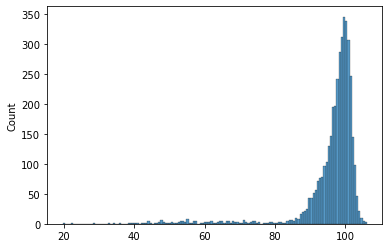

In [17]:
scores = []
for i, row in enumerate(table):
    scores.extend(row[:i])

sns.histplot(scores)

In [35]:
for i, j in zip(*np.where(df < 60)):
    if i > j:
        continue
    print(pretty_ldnd_names[i], pretty_ldnd_names[j], df.iloc[i, j])

Akkadian Assyrian 52.34
Armenian Western Armenian 55.43
Breton Welsh 57.4
Afrikaans Dutch 34.1
Afrikaans English 59.39
Afrikaans Low Saxon 47.38
Afrikaans German 59.5
Danish Norwegian 47.34
Danish Swedish 52.43
Dutch Low Saxon 38.66
Dutch German 48.83
English Low Saxon 56.97
Low Saxon German 44.61
Norwegian Swedish 48.23
Bhojpuri Hindi 50.73
Bhojpuri Urdu 47.96
Hindi Urdu 47.72
Galician Italian 49.9
Galician Portuguese 55.01
Galician Spanish 54.82
Italian Romanian 55.78
Italian Spanish 57.26
Belarusian Croatian 55.15
Belarusian Czech 52.01
Belarusian Polish 56.8
Belarusian Russian 50.76
Belarusian Serbian 54.88
Belarusian Slovak 47.78
Belarusian Slovenian 53.85
Belarusian Ukrainian 48.12
Belarusian Upper Sorbian 53.54
Bulgarian Croatian 47.15
Bulgarian Czech 54.11
Bulgarian Old Church Slavonic 47.75
Bulgarian Russian 58.81
Bulgarian Serbian 47.98
Bulgarian Slovak 55.33
Bulgarian Slovenian 40.24
Croatian Czech 43.72
Croatian Old Church Slavonic 43.97
Croatian Polish 55.2
Croatian Russia